<a href="https://colab.research.google.com/github/Abitha20042106/EDA_shopping_data_analysis/blob/main/EDA_Shopping_trend_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

colors = ["#FF5733", "#33FF57", "#3357FF", "#F0FF33", "#FF33F0",
          "#33FFF0", "#5733FF", "#FF8C33", "#8CFF33", "#33FF8C",
          "#8C33FF", "#FF3333", "#33FF33", "#3333FF", "#FFFF33",
          "#FF33FF", "#33FFFF", "#FF9933", "#99FF33", "#33FF99",
          "#9933FF", "#FF6633", "#66FF33", "#3366FF", "#FF3366"]


sales = pd.read_csv('/shopping_trends.csv')
sales.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
sales.shape

(3900, 19)

In [ ]:
sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [ ]:
sales.columns


Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [ ]:
sales.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [ ]:
sales_dup=sales[sales.duplicated()]
sales_dup

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases


Overall distribution of gender

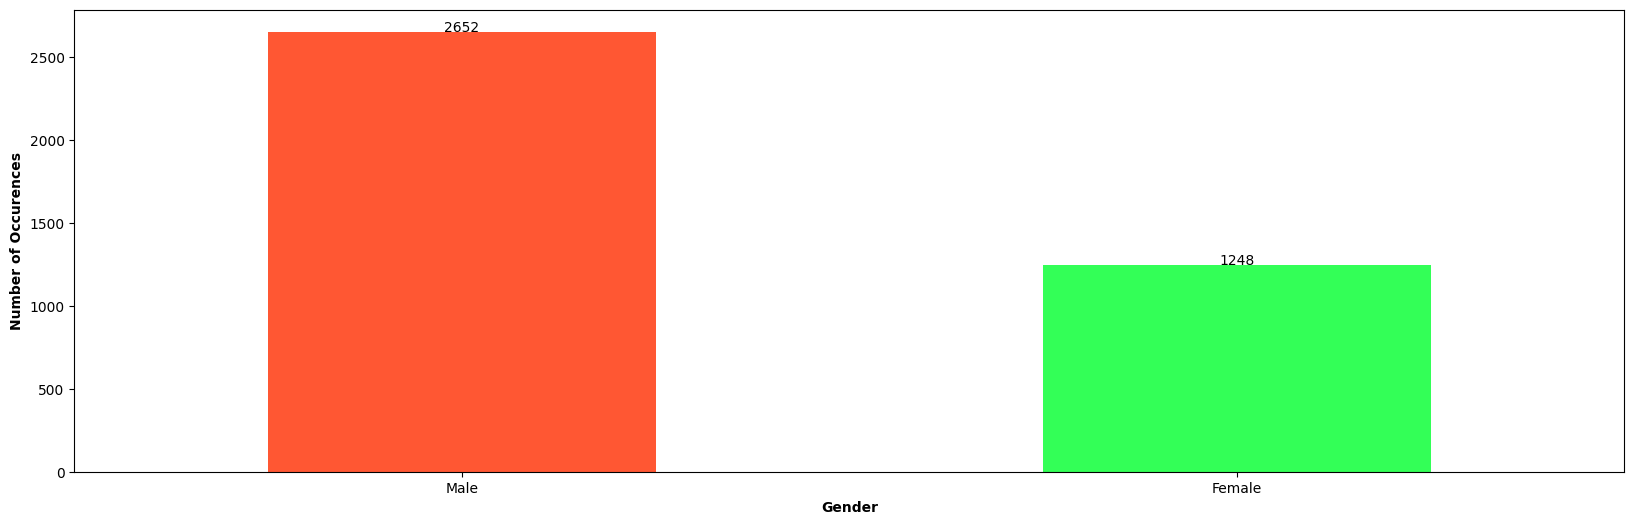

In [ ]:
bar_chart('Gender')

In [ ]:
sales["Gender"].unique()

array(['Male', 'Female'], dtype=object)

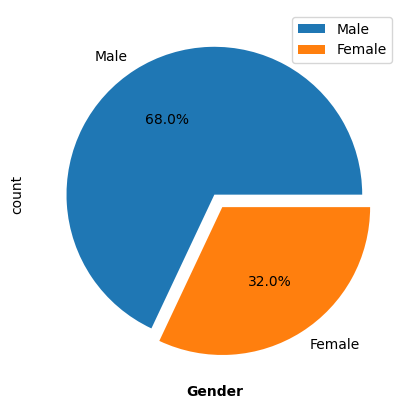

In [ ]:
gen_pie=sales['Gender'].value_counts()
gen_pie.plot(kind="pie",color=colors,explode=(0,0.1),autopct='%1.1f%%')
plt.xlabel("Gender",weight='bold')
plt.legend()
plt.show()

In [ ]:
sales.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [ ]:
sales.describe(include="object")

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Preferred Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Credit Card,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,696,675,2223,2223,677,584


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

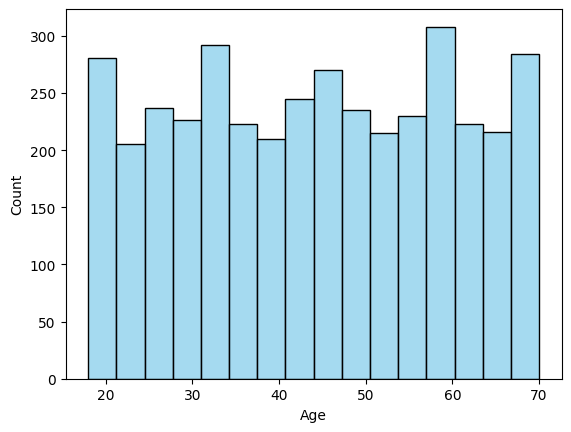

In [ ]:
sns.histplot(data=sales['Age'],color='skyblue')
plt.show()

In [ ]:
cat_count=sales['Category'].value_counts()
cat_count

,count
Category,
Clothing,1737
Accessories,1240
Footwear,599
Outerwear,324


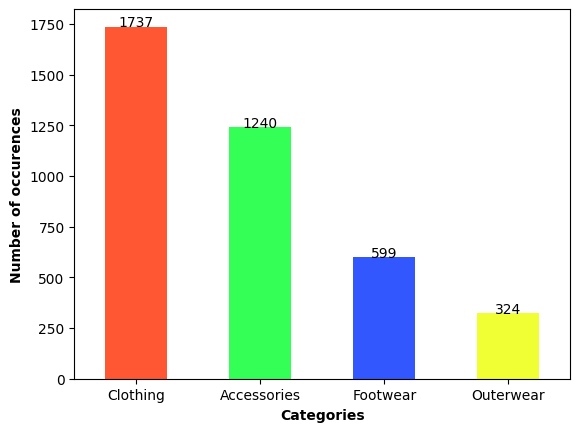

In [ ]:
cat_bar=sales['Category'].value_counts().plot(kind="bar",color=colors,rot=0)
for p in cat_bar.patches:
   cat_bar.annotate(int(p.get_height()), (p.get_x()+0.25,p.get_height()+1),ha='center')
plt.xlabel("Categories",weight='bold')
plt.ylabel("Number of occurences",weight='bold')
plt.show()

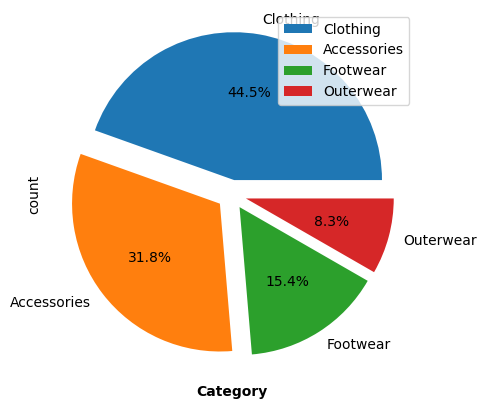

In [ ]:

data1=sales['Category'].value_counts()
explode=[0.1]*len(data1)
data1.plot(kind="pie",color=colors,explode=explode,autopct='%1.1f%%')
plt.xlabel("Category",weight='bold')
plt.legend()
plt.show()

In [ ]:
def pie_chart(col):
  plt.figure(figsize=(20,6))
  c=sales[col].value_counts()
  explode=[0]*(len(c)-1)+[0.1]
  c.plot(kind="pie",color=colors,explode=explode,autopct='%1.1f%%')
  plt.xlabel(col,weight='bold')
  plt.legend()
  plt.show()


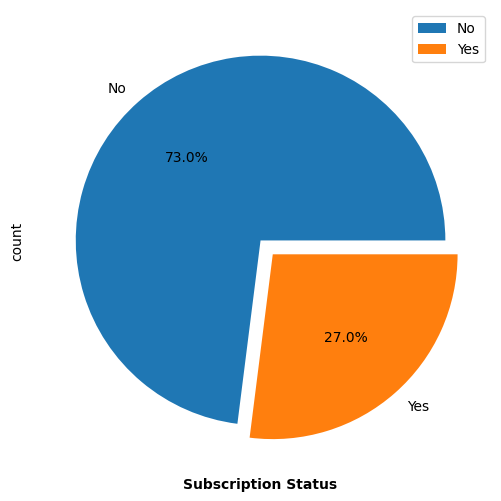

In [ ]:
pie_chart('Subscription Status')

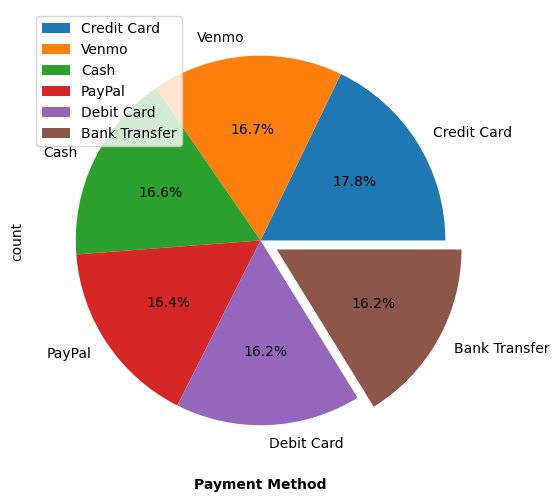

In [ ]:
pie_chart('Payment Method')

In [ ]:
def bar_chart(column):
  plt.figure(figsize=(20,6))
  find=sales[column].value_counts().plot(kind="bar",color=colors,rot=0)

  for p in find.patches:
    find.annotate(int(p.get_height()), (p.get_x()+0.25,p.get_height()+1),ha='center')
  plt.xlabel(column,weight='bold')
  plt.ylabel("Number of Occurences",weight='bold')
  plt.show()


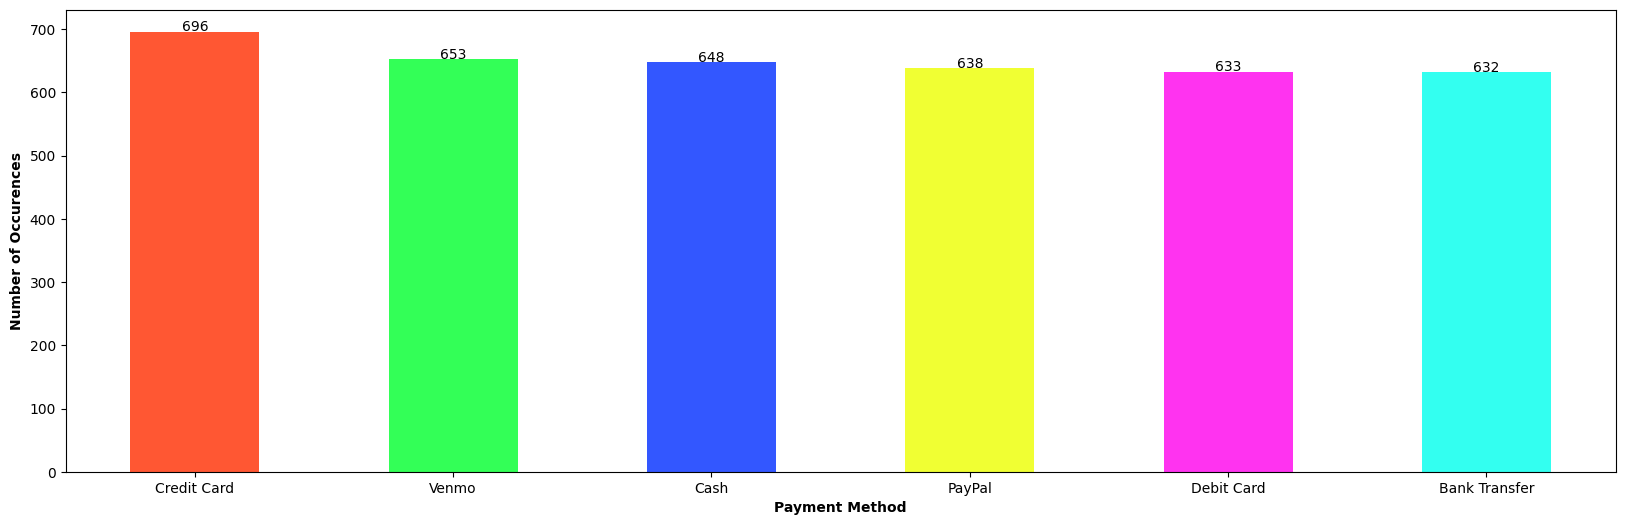

In [ ]:
bar_chart('Payment Method')

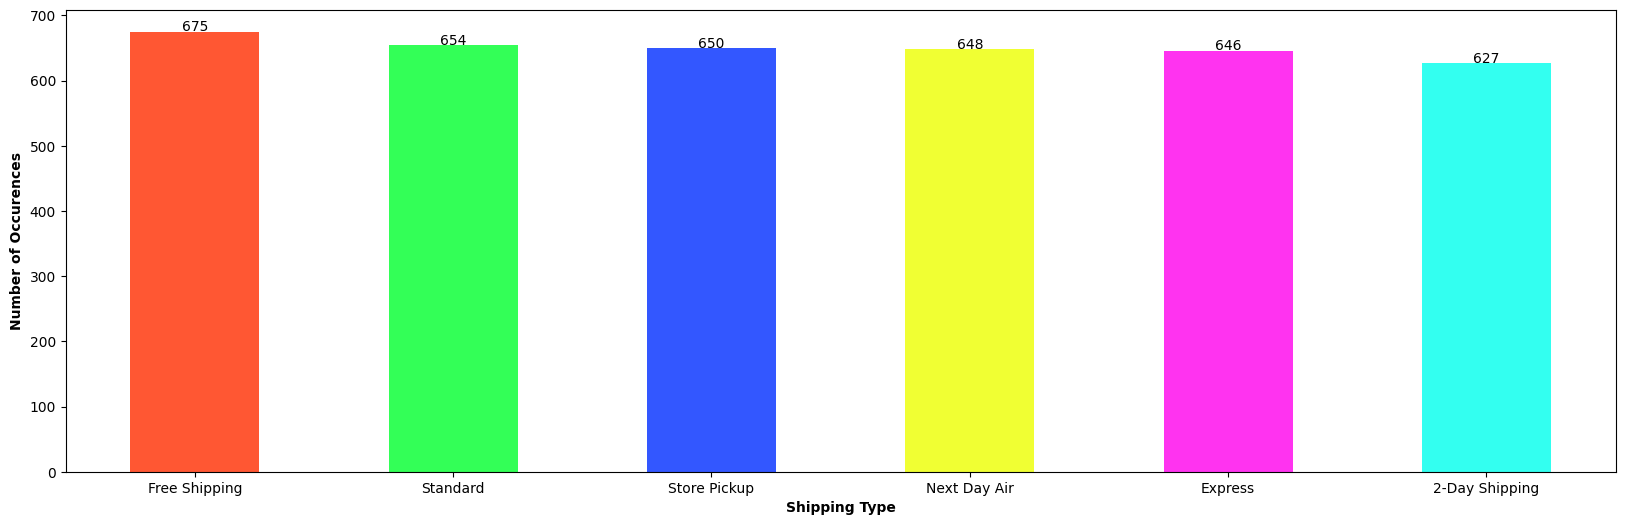

In [ ]:
bar_chart('Shipping Type')

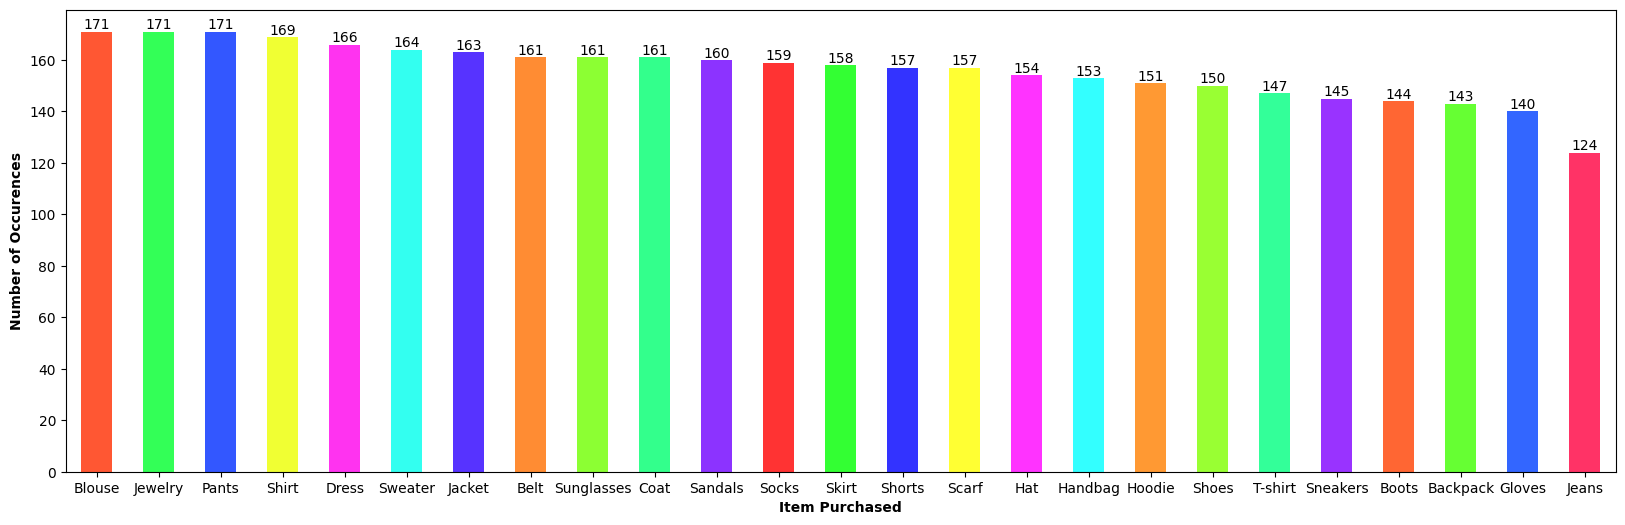

In [ ]:
bar_chart('Item Purchased')

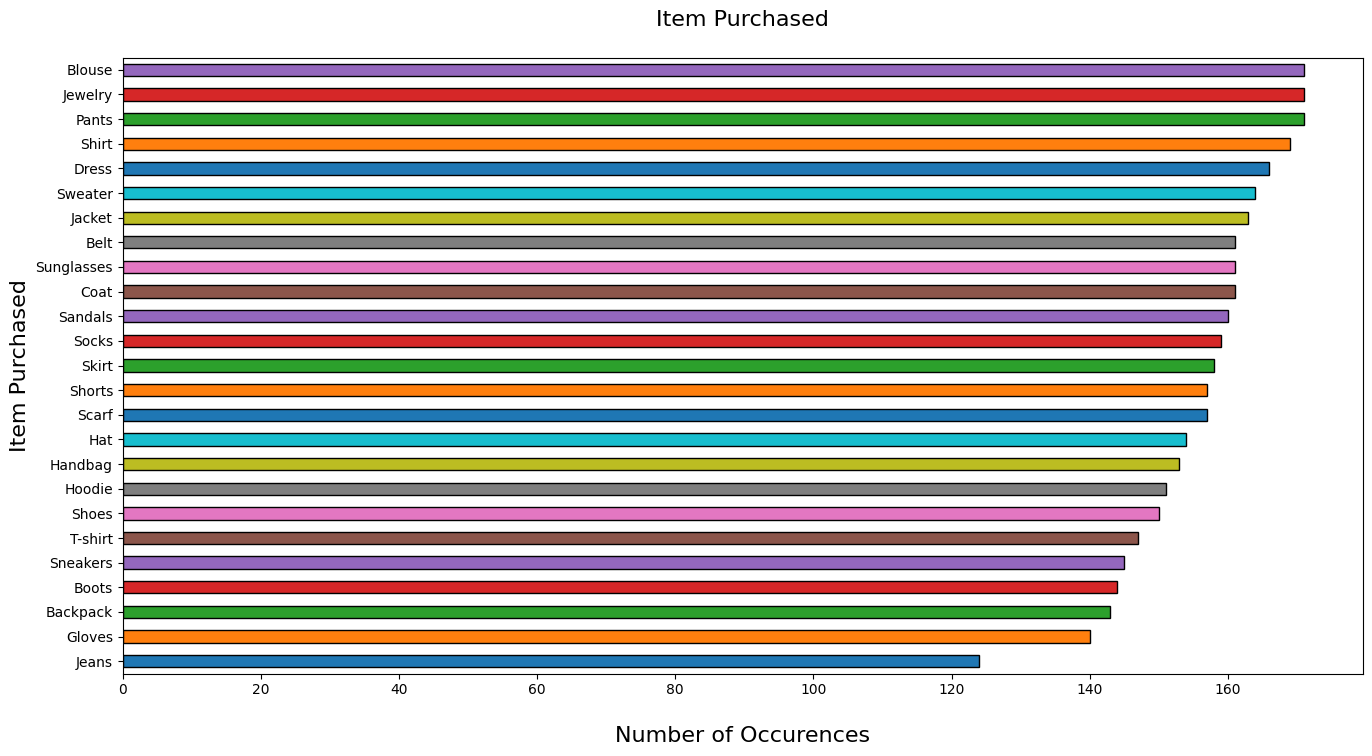

In [ ]:
plt.figure(figsize=(16,8))
sales['Item Purchased'].value_counts().sort_values().plot(kind='barh',color=sns.color_palette("tab10"),edgecolor='black')
plt.ylabel('Item Purchased',fontsize=16)
plt.xlabel("\nNumber of Occurences",fontsize=16)
plt.title("Item Purchased\n",fontsize=16)
plt.show()

In [ ]:
sales['Location'].value_counts()

,count
Location,
Montana,96
California,95
Idaho,93
Illinois,92
Alabama,89
Minnesota,88
Nebraska,87
New York,87
Nevada,87


In [ ]:
sales['Size'].value_counts()

,count
Size,
M,1755
L,1053
S,663
XL,429


In [ ]:
sales['Category'].value_counts()

,count
Category,
Clothing,1737
Accessories,1240
Footwear,599
Outerwear,324


In [ ]:
sales['Color'].value_counts()

,count
Color,
Olive,177
Yellow,174
Silver,173
Teal,172
Green,169
Black,167
Cyan,166
Violet,166
Gray,159


In [ ]:
sales['Season'].value_counts()

,count
Season,
Spring,999
Fall,975
Winter,971
Summer,955


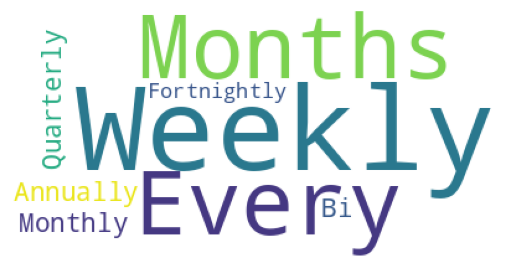

In [ ]:
text=" ".join(title for title in sales['Frequency of Purchases'])
word_cloud=WordCloud(collocations = False, background_color='white').generate(text)
plt.axis("off")
plt.imshow(word_cloud)
plt.show()

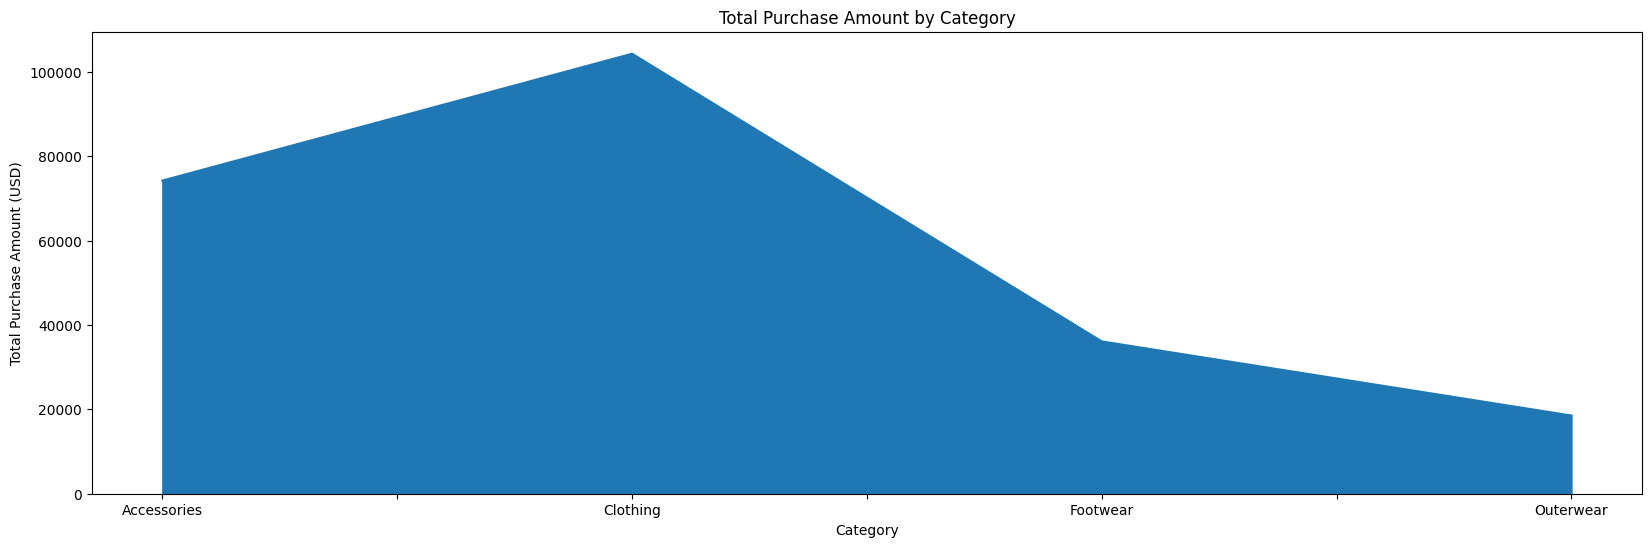

In [ ]:
plt.figure(figsize=(20,6))
cat_total=sales.groupby('Category')['Purchase Amount (USD)'].sum()
cat_total.plot(kind='area')
plt.ylabel('Total Purchase Amount (USD)')
plt.xlabel('Category')
plt.title("Total Purchase Amount by Category")
plt.show()

In [ ]:
avg=sales['Age'].mean()
avg

44.06846153846154

In [ ]:
sales['Item Purchased'].mode()
sales['Item Purchased'].mode()[0]

'Blouse'

In [ ]:
sales[sales['Gender']=='Male']['Item Purchased'].mode()

,Item Purchased
0,Pants


In [ ]:
sales[sales['Gender']=='Female']['Item Purchased'].mode()

,Item Purchased
0,Blouse


In [ ]:
com_season=sales['Season'].mode()[0]
com_season

'Spring'

In [ ]:
max_rat=sales['Review Rating'].max()
min_rat=sales['Review Rating'].min()
max_rat


5.0

In [ ]:
min_rat

2.5

In [ ]:
ava_rat_male=sales[sales['Gender']=='Male']['Review Rating'].mean()
ava_rat_male

3.7539592760180995

In [ ]:
ava_rat_female=sales[sales['Gender']=='Female']['Review Rating'].mean()
ava_rat_female

3.741426282051282